In [1]:
# Yulduz - Capturing the Photo for the Input


from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


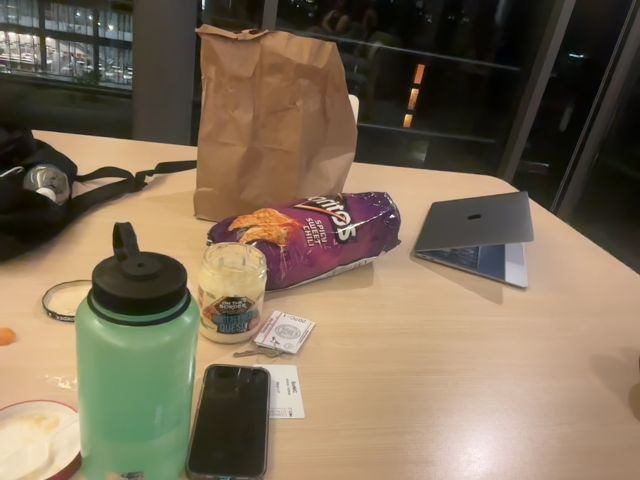

In [2]:
#Yulduz Display the Image
from IPython.display import Image
try:
  imgPath = take_photo()
  print('Saved to {}'.format(imgPath))

  # Show the image which was just taken.
  display(Image(imgPath))
except Exception as err:
  # if the user does not have a webcam or if they do not
  # grant the page permission to access, Throw ERRROR
  print(str(err))

In [3]:
# SOURCE_IMAGE_PATH = '/content/fridge1.jpeg'
SOURCE_IMAGE_PATH = '/content/photo.jpg'

In [4]:
!pip install -q transformers==4.36.2 einops xformers bitsandbytes accelerate bitsandbytes-cuda117 apex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 82.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 12.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.8/709.8 kB 65.1 MB/s eta 0:00:00
  Preparing met

In [5]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.6 MB/s eta 0:00:00


In [6]:
"""
This is a demo for using CogAgent and CogVLM in CLI
Make sure you have installed vicuna-7b-v1.5 tokenizer model (https://huggingface.co/lmsys/vicuna-7b-v1.5), full checkpoint of vicuna-7b-v1.5 LLM is not required.
In this demo, We us chat template, you can use others to replace such as 'vqa'.
Strongly suggest to use GPU with bfloat16 support, otherwise, it will be slow.
Mention that only one picture can be processed at one conversation, which means you can not replace or insert another picture during the conversation.
"""

import torch

from PIL import Image
from transformers import AutoModelForCausalLM, LlamaTokenizer



MODEL_PATH = "THUDM/cogagent-chat-hf"
TOKENIZER_PATH ="lmsys/vicuna-7b-v1.5"
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

tokenizer = LlamaTokenizer.from_pretrained(TOKENIZER_PATH)

torch_type = torch.float16


print("========Use torch type as:{} with device:{}========\n\n".format(torch_type, DEVICE))


model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    torch_dtype=torch_type,
    low_cpu_mem_usage=True,
    load_in_4bit=True,
    trust_remote_code=True
).eval()

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to acc

tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

========Use torch type as:torch.float16 with device:cuda========




config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

configuration_cogagent.py:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/THUDM/cogagent-chat-hf:
- configuration_cogagent.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_cogagent.py:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


cross_visual.py:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/THUDM/cogagent-chat-hf:
- cross_visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


visual.py:   0%|          | 0.00/5.45k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/THUDM/cogagent-chat-hf:
- visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/THUDM/cogagent-chat-hf:
- modeling_cogagent.py
- cross_visual.py
- visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.regist

Please 'pip install apex'


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/177k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/1.78G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Some weights of CogAgentForCausalLM were not initialized from the model checkpoint at THUDM/cogagent-chat-hf and are newly initialized: ['model.cross_vision.vit.model.blocks.10.attn.rope.freqs_sin', 'model.cross_vision.vit.model.blocks.18.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.5.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.23.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.3.attn.rope.freqs_sin', 'model.cross_vision.vit.model.blocks.17.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.4.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.12.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.19.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.0.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.16.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.11.attn.rope.freqs_cos', 'model.cross_vision.vit.model.blocks.22.attn.rope.freqs_sin', 'model.cross_vision.vit.model.blocks.19.attn.rope.freqs_sin',

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [7]:
!pip install bitsandbytes-cuda118

ERROR: Could not find a version that satisfies the requirement bitsandbytes-cuda118 (from versions: none)
ERROR: No matching distribution found for bitsandbytes-cuda118


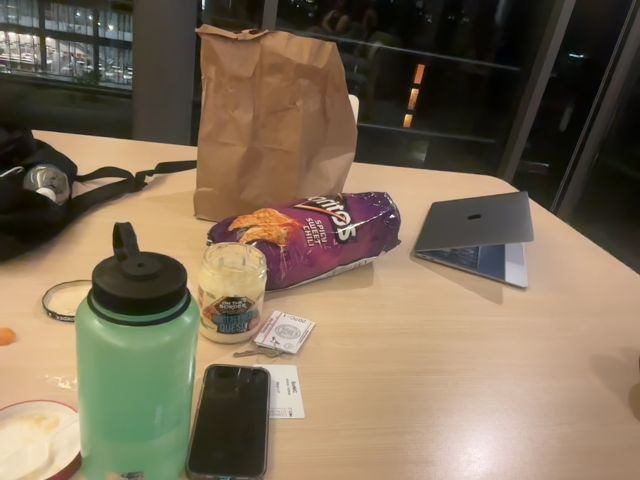

In [8]:
# If you want the image to run through the captured Camera use this code:
from PIL import Image
img = Image.open(imgPath)
img

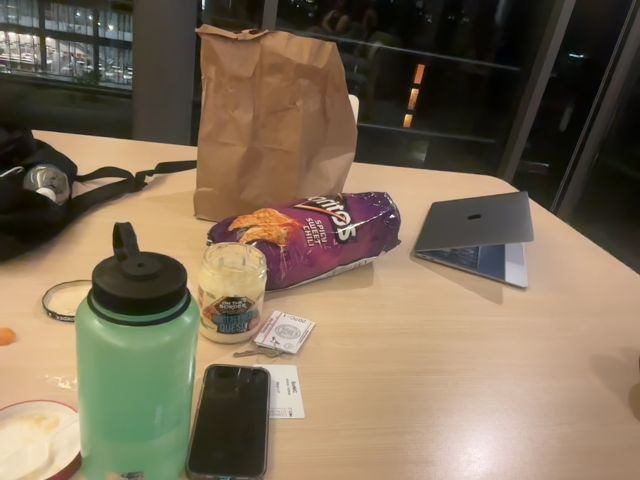

In [9]:
from PIL import Image
img = Image.open(SOURCE_IMAGE_PATH)
img

# Modified Pic

In [10]:
text_only_template = "A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: {} ASSISTANT:"

image_path = imgPath
if image_path == '':
    print('You did not enter image path, the following will be a plain text conversation.')
    image = None
    text_only_first_query = True
else:
    image = Image.open(image_path).convert('RGB')

history = []

query = "Give me a list of names of objects in the image. Give only the objects. Seperated by space. Don't use commas and the word 'and'"

if image is None:
    if text_only_first_query:
        query = text_only_template.format(query)
        text_only_first_query = False
    else:
        old_prompt = ''
        for _, (old_query, response) in enumerate(history):
            old_prompt += old_query + " " + response + "\n"
        query = old_prompt + "USER: {} ASSISTANT:".format(query)

if image is None:
    input_by_model = model.build_conversation_input_ids(tokenizer, query=query, history=history, template_version='base')
else:
    input_by_model = model.build_conversation_input_ids(tokenizer, query=query, history=history, images=[image])

inputs = {
    'input_ids': input_by_model['input_ids'].unsqueeze(0).to("cuda"),
    'token_type_ids': input_by_model['token_type_ids'].unsqueeze(0).to("cuda"),
    'attention_mask': input_by_model['attention_mask'].unsqueeze(0).to("cuda"),
    'images': [[input_by_model['images'][0].to("cuda").to(torch.float16)]] if image is not None else None,
}
if 'cross_images' in input_by_model and input_by_model['cross_images']:
    inputs['cross_images'] = [[input_by_model['cross_images'][0].to("cuda").to(torch.float16)]]

gen_kwargs = {"max_length": 2048, "do_sample": False}

with torch.no_grad():
    outputs = model.generate(**inputs, **gen_kwargs)
    outputs = outputs[:, inputs['input_ids'].shape[1]:]
    response = tokenizer.decode(outputs[0])
    response = response.split("</s>")[0]
    print("\nCog:", response)

history.append((query, response))

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:426: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(



Cog: phone, bag, laptop, water bottle, food, backpack


In [11]:
# Create the list of objects
objects = [obj.strip() for obj in response.split(',')]
# Print the list of objects
print("Objects:", objects)

Objects: ['phone', 'bag', 'laptop', 'water bottle', 'food', 'backpack']


In [12]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


Remove model

In [13]:
# cd ~/.cache/huggingface/hub/

In [14]:
# rm -rf models--lmsys--vicuna-7b-v1.5


In [15]:
# rm -rf "models--THUDM--cogagent-chat-hf"


In [16]:
import transformers
print(transformers.__version__)

4.36.2


In [17]:

import re
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

Processed image saved as /content/sample_data/processed_image.png


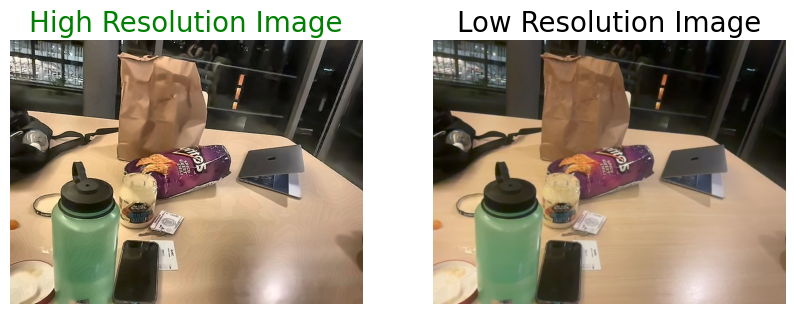

In [18]:
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"Error: The file {image_path} does not exist.")
        return None
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Can't open image at {image_path}")
        return None
    # Denoise
    image = cv2.fastNlMeansDenoisingColored(image, None, 3, 3, 7, 21)
    # Sharpen
    kernel = np.array([[0, -0.5, 0],
                       [-0.5, 3, -0.5],
                       [0, -0.5, 0]])
    image = cv2.filter2D(image, -1, kernel)
    # Convert to LAB color space for better contrast enhancement
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return image

# Example usage
image_path = '/content/photo.jpg'  # Replace with your image path
processed_image = preprocess_image(image_path)
if processed_image is not None:
    # Convert processed image to PIL format for display with PIL
    image_pil = Image.fromarray(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    image_pil.show()

    # Save the processed image as a PNG file
    processed_image_path = '/content/sample_data/processed_image.png'
    cv2.imwrite(processed_image_path, processed_image)
    print(f"Processed image saved as {processed_image_path}")

    # Display high and low-resolution images side by side
    plt.figure(figsize=(10, 5))

    # High resolution image
    plt.subplot(1, 2, 1)
    plt.title('High Resolution Image', color='green', fontsize=20)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Low resolution image
    plt.subplot(1, 2, 2)
    plt.title('Low Resolution Image', color='black', fontsize=20)
    low_res_image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(low_res_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()
else:
    print("Image processing failed. Check the file path and ensure the image can be opened.")


array([[[ 71,  69,  63],
        [ 71,  69,  63],
        [ 68,  68,  62],
        ...,
        [ 30,  32,  33],
        [ 85,  88,  92],
        [ 63,  71,  73]],

       [[ 99, 101,  94],
        [102, 103,  95],
        [ 93,  91,  83],
        ...,
        [ 49,  56,  55],
        [ 84,  84,  91],
        [ 63,  71,  73]],

       [[ 91,  93,  86],
        [ 96,  98,  91],
        [ 87,  86,  77],
        ...,
        [ 66,  71,  73],
        [ 80,  85,  87],
        [ 64,  72,  74]],

       ...,

       [[174, 202, 218],
        [174, 202, 218],
        [174, 202, 218],
        ...,
        [ 77,  99, 127],
        [ 77,  99, 127],
        [ 77,  99, 127]],

       [[174, 202, 218],
        [174, 202, 218],
        [174, 202, 218],
        ...,
        [ 77,  99, 127],
        [ 77,  99, 127],
        [ 77,  99, 127]],

       [[174, 202, 218],
        [174, 202, 218],
        [174, 202, 218],
        ...,
        [ 77,  99, 127],
        [ 77,  99, 127],
        [ 77,  99, 127]]], dtype=uint8)
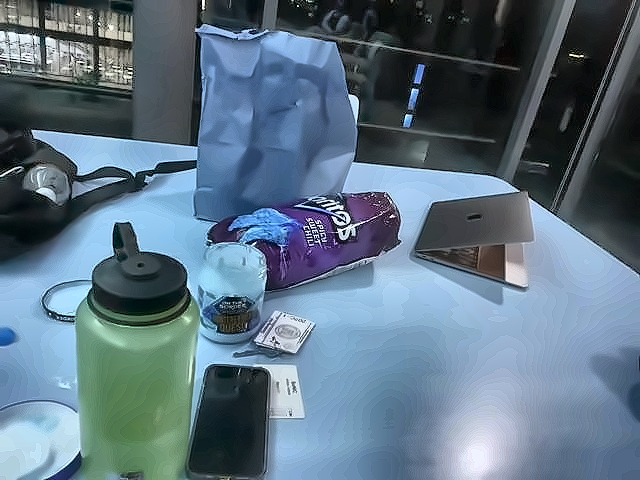

In [19]:
from PIL import Image
img = preprocess_image(image_path)
img


## YOLO

In [20]:
import os
HOME = os.getcwd()
print(HOME)
# Installing YOLO
!pip install -q inference-gpu[yolo-world]==0.9.12rc1
!pip install -q supervision==0.19.0rc3
import cv2
import supervision as sv

from tqdm import tqdm
from inference.models.yolo_world.yolo_world import YOLOWorld
# Select Model
model = YOLOWorld(model_id="yolo_world/l")
print(type(objects))
print(f"Total objects : {len(objects)}")
print(f"Using classes {objects}")


/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.1/252.1 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━

[06/28/24 05:43:20] WARNING  Your inference package version 0.9.12rc1 is out of date! Please upgrade ]8;id=86095;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=663746;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             to version 0.13.0 of inference for the latest features and bug fixes by               
                             running `pip install --upgrade inference`.                                            

<class 'list'>
Total objects : 6
Using classes ['phone', 'bag', 'laptop', 'water bottle', 'food', 'backpack']


In [21]:
# #clear gpu memory
# !pip install numba

# from numba import cuda
# device = cuda.get_current_device()
# device.reset()


import torch
torch.cuda.empty_cache()

In [22]:
model.set_classes(objects)
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image)
detections = sv.Detections.from_inference(results)


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 80.8MiB/s]


In [23]:
!nvidia-smi

Fri Jun 28 05:43:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              49W / 400W |  16445MiB / 40960MiB |      4%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

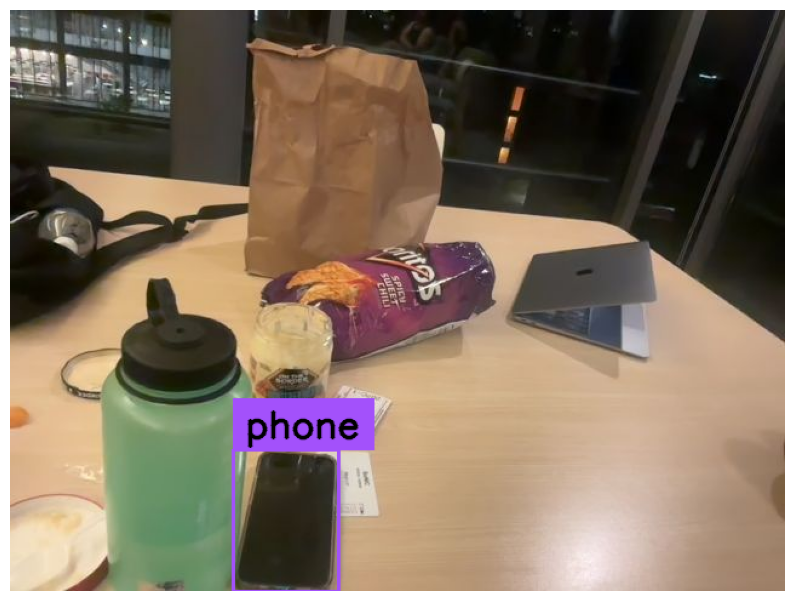

In [24]:
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

More confidence

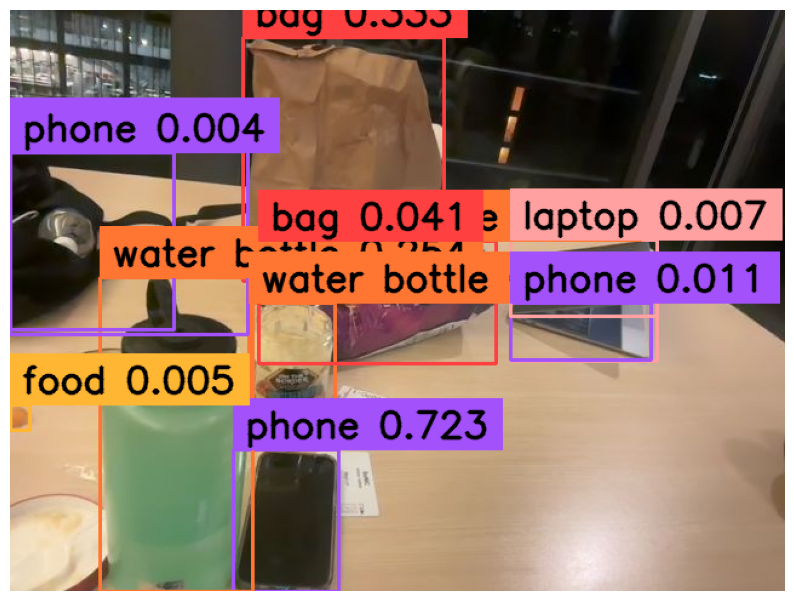

In [25]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image, confidence=0.003)
detections = sv.Detections.from_inference(results)

labels = [
    f"{objects[class_id]} {confidence:0.3f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections, labels=labels)
sv.plot_image(annotated_image, (10, 10))

remove double

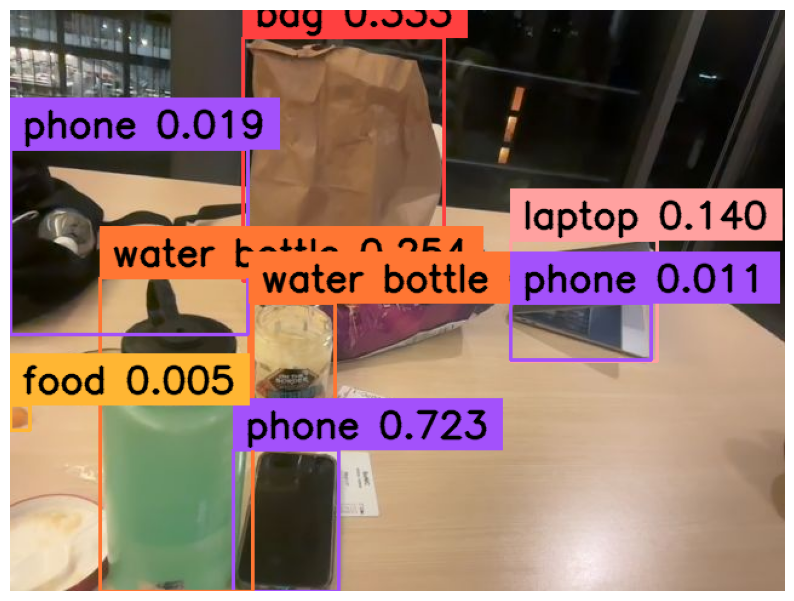

True

In [27]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image, confidence=0.003)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)
labels = [
    f"{objects[class_id]} {confidence:0.3f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections, labels=labels)
sv.plot_image(annotated_image, (10, 10))
# Display or save the annotated image
output_image_path = '/content/annotated_image.jpg'
cv2.imwrite(output_image_path, annotated_image)

In [28]:
import time
import re

time.sleep(5) # Wait 5 seconds to save the file
img = Image.open('/content/annotated_image.jpg')
Question = f"Given the list of objects {objects} and the image, give what the image is about and which objects are present and where [look at the placement of text on the image]?. Start as, infront of you is a [kitchen or something] and has these objects... object1 is placed on.. and object2 on top of that"
prompt = f'USER: <image>\n{Question}?\nASSISTANT:'
outputs = pipe(img, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
# Extract the generated text
generated_text = outputs[0]['generated_text']

# Use a regular expression to extract the part after "ASSISTANT:"
assistant_part = re.search(r'ASSISTANT:\s*(.*)', generated_text, re.DOTALL).group(1)

print("Assistant Part:", assistant_part)

Assistant Part: The image is about a table with various objects on it. The objects present on the table include a cell phone, a water bottle, a bag, a laptop, and a backpack. The cell phone is placed on the table, while the water bottle, bag, laptop, and backpack are all on top of the table. The table appears to be a dining table, as it is described as a kitchen or something.


TTS

In [29]:
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio
def text_to_speech(text, filename):
    # Perform text-to-speech conversion
    tts = gTTS(text)

    # Save the audio
    tts.save(filename)

    # Display the audio file
    return Audio(filename)

.wav

In [30]:
filename = "output.wav"

# Convert text to speech and save as .wav file
audio = text_to_speech(assistant_part, filename)

# Play the audio
audio